# Machine Learning

## Libraries

* we will be using Tensorflow 2.0, which is not installed by default on Google Colab, so we will pip install it
  * this will take a couple of seconds, wait for the cell to finish running
* after this, we will import all the libraries we will be using for our machine learning model

In [0]:
%%capture
!pip install tensorflow==2.0.0-alpha0

In [0]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Image, display
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')

print(tf.__version__)

KeyboardInterrupt: ignored

## Installing the Dataset

Reading files straight from Google Drive takes too long, so we have to load all the data into Google Colab's local. This can be done in two ways:

1. 
  - Create a Kaggle Account
  - Go to My Account > Create New API Token
  - Download the .json file and store it in ```~/.kaggle```
  - Run the kaggle download command found in https://www.kaggle.com/c/dog-breed-identification/data
  - Unzip the downloaded files
  - (Simply run the first part of the code block below)

2. 
  - Download the .zip files from https://www.kaggle.com/c/dog-breed-identification/data and upload to Google Drive
  - Move the .zip files to local
  - Unzip all the moved files
  - (Simply run the second part of the code block below)


In [0]:
# Get data through Kaggle API

# !mkdir ~/.kaggle
# !cp gdrive/'My Drive'/dogs/data/kaggle.json ~/.kaggle
# !kaggle competitions download -c dog-breed-identification
# !unzip labels.csv
# !unzip train
# !unzip test


# Get data from gdrive

!cp gdrive/'My Drive'/dogs/data/dog-breed-identification/labels.csv .
!cp gdrive/'My Drive'/dogs/data/dog-breed-identification/test.zip .
!cp gdrive/'My Drive'/dogs/data/dog-breed-identification/train.zip .
!unzip train
!unzip test

cp: cannot stat 'gdrive/My Drive/dogs/data/dog-breed-identification/labels.csv': No such file or directory
cp: cannot stat 'gdrive/My Drive/dogs/data/dog-breed-identification/test.zip': No such file or directory
cp: cannot stat 'gdrive/My Drive/dogs/data/dog-breed-identification/train.zip': No such file or directory
unzip:  cannot find or open train, train.zip or train.ZIP.
unzip:  cannot find or open test, test.zip or test.ZIP.


## Grouping Dog Breeds
Since there are only about 10000 labelled images we can use for training and testing but 120 breeds in total, we tested grouping all the dog breeds into larger categories to improve accuracy

In [0]:
labels = pd.read_csv("labels.csv")
breeds = labels["breed"].unique()
breeds.sort()

# AKC Groups 
# https://www.akc.org/public-education/resources/general-tips-information/dog-breeds-sorted-groups/

herding = ['border_collie', 'bouvier_des_flandres', 'briard', 'cardigan', 'collie', 'entlebucher', 'german_shepherd', 'groenendael', 'kelpie', 'malinois', 'old_english_sheepdog', 'pembroke', 'shetland_sheepdog']
hound = ['afghan_hound', 'basenji', 'basset', 'beagle', 'black-and-tan_coonhound', 'bloodhound', 'bluetick', 'borzoi', 'english_foxhound', 'ibizan_hound', 'irish_wolfhound', 'norwegian_elkhound', 'otterhound', 'redbone', 'rhodesian_ridgeback', 'saluki', 'scottish_deerhound', 'walker_hound', 'whippet']
sporting = ['brittany_spaniel', 'chesapeake_bay_retriever', 'clumber', 'cocker_spaniel', 'curly-coated_retriever', 'english_setter', 'english_springer', 'flat-coated_retriever', 'german_short-haired_pointer', 'golden_retriever', 'gordon_setter', 'irish_setter', 'irish_water_spaniel', 'labrador_retriever', 'sussex_spaniel', 'vizsla', 'weimaraner', 'welsh_springer_spaniel']
non_sporting = ['boston_bull', 'chow', 'eskimo_dog', 'french_bulldog', 'keeshond', 'lhasa', 'schipperke', 'standard_poodle', 'tibetan_terrier']
toy = ['affenpinscher', 'blenheim_spaniel', 'brabancon_griffon', 'chihuahua', 'italian_greyhound', 'japanese_spaniel', 'maltese_dog', 'miniature_pinscher', 'miniature_poodle', 'papillon', 'pekinese', 'pomeranian', 'pug', 'shih-tzu', 'silky_terrier', 'toy_poodle', 'toy_terrier', 'yorkshire_terrier']
terrier = ['airedale', 'american_staffordshire_terrier', 'australian_terrier', 'bedlington_terrier', 'border_terrier', 'cairn', 'dandie_dinmont', 'irish_terrier', 'kerry_blue_terrier', 'lakeland_terrier', 'mexican_hairless', 'miniature_schnauzer', 'norfolk_terrier', 'norwich_terrier', 'scotch_terrier', 'sealyham_terrier', 'soft-coated_wheaten_terrier', 'staffordshire_bullterrier', 'west_highland_white_terrier', 'wire-haired_fox_terrier']
working = ['appenzeller', 'bernese_mountain_dog', 'boxer', 'bull_mastiff', 'doberman', 'giant_schnauzer', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'komondor', 'kuvasz', 'leonberg', 'malamute', 'newfoundland', 'rottweiler', 'saint_bernard', 'samoyed', 'siberian_husky', 'standard_schnauzer', 'tibetan_mastiff']
wild = ['african_hunting_dog', 'dhole', 'dingo']

groups = {"herding": herding, "hound": hound, "sporting": sporting, "non_sporting": non_sporting, "toy": toy, "terrier": terrier, "working": working, "wild": wild}

if (len(herding) + len(hound) + len(sporting) + len(non_sporting) + len(toy) + len(terrier) + len(working) + len(wild)) != len(breeds):
  print("Error in AKC groups: length")

for group in groups:
  for breed in groups[group]:
    if breed not in breeds:
      print("Error in AKC groups: breed name")
      break

labels["breed"] = [[group for group in groups if breed in groups[group]][0] for i, breed in labels["breed"].iteritems()]
labels.to_csv("labels_akc.csv", index=False)

In [0]:
# Specifiying file paths

base_path = ''
train_path = base_path + 'train/'
test_path = base_path + 'test/'

# labels.csv for 120 original dog breeds
# labels_akc.csv for 8 dogs groups
csv_path = base_path + 'labels.csv'

In [0]:
train_csv = pd.read_csv(csv_path)

train_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


## Data Selection

We will explore three options of data sources:

1. the entire dataset 
  * advatages: there's a lot of data (10,000 images)
  * disadvantages: too many labels (120 breeds)
2. top-n breeds
  * advantages: limits the amount of labels 
  * disadvantages: reduces the data (because approx equal distribution of data accross each breed in the dataset)
3. similar breed groups (terriers, hounds, etc.)
  * advantages: limits labels while keeping breed count high
  * disadvantages: grouping dogs is subjective (we are only grouping by similar keywords, the dogs with the same breed keyword may be very different)



### 1. The Entire Dataset

In [0]:
unique_breeds = train_csv.breed.unique()

breeds = {unique_breeds[i]: i for i in range(len(unique_breeds))}

In [0]:

fnames = [train_path + fname + '.jpg' for fname in train_csv['id'].tolist()]
labels = [breeds[s] for s in train_csv['breed'].tolist()]

train_fnames, test_fnames, train_labels, test_labels = train_test_split(fnames,
                                                                        labels,
                                                                        train_size=0.9,
                                                                        random_state=420)

num_train = len(train_fnames)
num_test = len(test_fnames)

### 2. The Top-N Breeds

In [0]:
def top_n(n, labels, train_path):

  # Get the top-n breeds as a list of strings
  breed_counts = train_csv.breed.value_counts()
  top_n_breeds = breed_counts[0:n].keys().to_list()

  # Make a table of only the top-n breeds
  top_n_labels = labels[labels.breed.isin(top_n_breeds)]

  # Create a breeds dictionary
  unique_breeds = top_n_labels.breed.unique()
  breeds = {unique_breeds[i]: i for i in range(len(unique_breeds))} 

  # create fnames and labels
  fnames = [train_path + fname + '.jpg' for fname in top_n_labels['id'].tolist()]
  labels = [breeds[s] for s in top_n_labels['breed'].tolist()]

  # split training and test dataset
  train_fnames, test_fnames, train_labels, test_labels = train_test_split(fnames,
                                                                        labels,
                                                                        train_size=0.9,
                                                                        random_state=420)
  
  # Lengths of our train / test
  num_train = len(train_fnames)
  num_test = len(test_fnames)

  return breeds, train_fnames, test_fnames, train_labels, test_labels, num_train, num_test

In [0]:
breeds, train_fnames, test_fnames, train_labels, test_labels, num_train, num_test = top_n(10, train_csv, train_path)

In [0]:
num_train

9199

### 3. Similar Breed Groups


In [0]:
unique_breeds = train_csv.breed.unique()
breeds = {unique_breeds[i]: i for i in range(len(unique_breeds))}

breeds

{'affenpinscher': 24,
 'afghan_hound': 74,
 'african_hunting_dog': 13,
 'airedale': 63,
 'american_staffordshire_terrier': 68,
 'appenzeller': 46,
 'australian_terrier': 42,
 'basenji': 7,
 'basset': 41,
 'beagle': 95,
 'bedlington_terrier': 5,
 'bernese_mountain_dog': 67,
 'black-and-tan_coonhound': 22,
 'blenheim_spaniel': 110,
 'bloodhound': 47,
 'bluetick': 3,
 'border_collie': 53,
 'border_terrier': 33,
 'borzoi': 6,
 'boston_bull': 0,
 'bouvier_des_flandres': 115,
 'boxer': 17,
 'brabancon_griffon': 80,
 'briard': 91,
 'brittany_spaniel': 50,
 'bull_mastiff': 66,
 'cairn': 23,
 'cardigan': 70,
 'chesapeake_bay_retriever': 92,
 'chihuahua': 58,
 'chow': 82,
 'clumber': 72,
 'cocker_spaniel': 118,
 'collie': 55,
 'curly-coated_retriever': 106,
 'dandie_dinmont': 93,
 'dhole': 31,
 'dingo': 1,
 'doberman': 18,
 'english_foxhound': 87,
 'english_setter': 27,
 'english_springer': 117,
 'entlebucher': 54,
 'eskimo_dog': 78,
 'flat-coated_retriever': 83,
 'french_bulldog': 114,
 'german

In [0]:
fnames = [train_path + fname + '.jpg' for fname in train_csv['id'].tolist()]
labels = [breeds[s] for s in train_csv['breed'].tolist()]

train_fnames, test_fnames, train_labels, test_labels = train_test_split(fnames,
                                                                        labels,
                                                                        train_size=0.9,
                                                                        random_state=420)
num_train = len(train_fnames)
num_test = len(test_fnames)

num_train, num_test

(9199, 1023)

## Parsing the Data

* IMAGE_SIZE determines the height and width of the image in pixels

### parse_fn
1. **read_file**: creates a tensor string about a file (given the path)
2. **decode_jpeg**: creates tensor array of the image (RGB values 0-255)
3. convert *int* to *float*, standardize the values to ± 1.0
4. Resize the image to 96 x 96 image
  * this stretches the image down to the 96 x 96 resolution, not crop

Areas to improve:
* crop iamges at appropriate places
* possibly generate more data with rotations

In [0]:
IMAGE_SIZE = 96

image_decoded = tf.image.decode_jpeg(tf.io.read_file(fnames[0]))
image_normalized = (tf.cast(image_decoded, tf.float32)/127.5) - 1
image_resized = tf.image.resize(image_normalized, (IMAGE_SIZE, IMAGE_SIZE))

image_normalized.shape, image_resized.shape

(TensorShape([375, 500, 3]), TensorShape([96, 96, 3]))

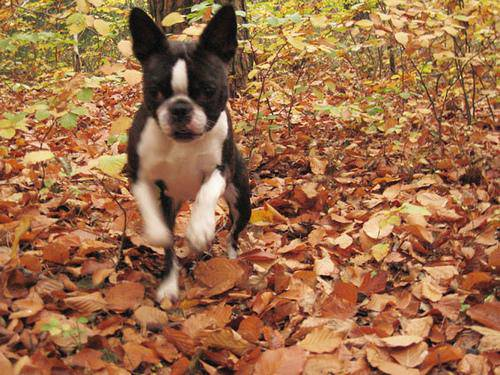

In [0]:
from IPython.display import Image
Image(filename=fnames[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


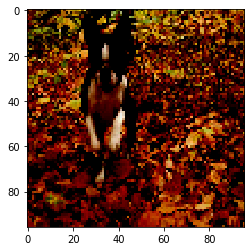

In [0]:
import matplotlib.pyplot as plt
plt.imshow(image_resized)

### Creating our Training / Validation Data

* Goal: create a PrefetchDataset object for training and validation data
  * this reduces overall [processing time](https://www.tensorflow.org/guide/data_performance)
* tf.constant() just makes arrays tensor types
* to adjust what data is given, just change fnames and labels size

In [0]:
def parse_fn(filename, label):
  image_string = tf.io.read_file(filename)
  image_decoded = tf.image.decode_jpeg(image_string)
  image_normalized = (tf.cast(image_decoded, tf.float32)/127.5) - 1
  image_resized = tf.image.resize(image_normalized, (IMAGE_SIZE, IMAGE_SIZE))
  return image_resized, label

In [0]:
BATCH_SIZE = 32

train_data = tf.data.Dataset.from_tensor_slices((tf.constant(train_fnames), tf.constant(train_labels))).map(parse_fn).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
val_data = tf.data.Dataset.from_tensor_slices((tf.constant(test_fnames), tf.constant(test_labels))).map(parse_fn).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

## Creating our Model

In [0]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Base model with MobileNetV2
# base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
#                                                include_top=False, 
#                                                weights='imagenet')

# Base model with ResNet50
# base_model = tf.keras.applications.resnet50.ResNet50(include_top=False, 
#                                                      weights='imagenet', 
#                                                      input_shape=IMG_SHAPE)

base_model = tf.keras.applications.xception.Xception(include_top=False, 
                                     weights='imagenet',
                                     input_shape=IMG_SHAPE)
base_model.trainable = False

In [0]:
# Trainable classification head
maxpool_layer = tf.keras.layers.GlobalMaxPooling2D()
prediction_layer = tf.keras.layers.Dense(len(breeds), activation='softmax')

In [0]:
learning_rate = 0.0001

model = tf.keras.Sequential([
    base_model,
    maxpool_layer,
    prediction_layer
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 3, 3, 2048)        20861480  
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               245880    
Total params: 21,107,360
Trainable params: 245,880
Non-trainable params: 20,861,480
_________________________________________________________________


In [0]:
num_epochs = 30
steps_per_epoch = round(num_train)//BATCH_SIZE
val_steps = 20

In [0]:
# NOT WORKING

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(train_data)

history = model.fit_generator(datagen.flow(train_fnames, train_labels, batch_size=BATCH_SIZE),
                    steps_per_epoch=steps_per_epoch, 
                    epochs=epochs,
                    validation_data=val_data.repeat())

TypeError: ignored

In [0]:
history = model.fit(train_data.repeat(),
                    epochs=num_epochs,
                    steps_per_epoch = steps_per_epoch,
                    validation_data=val_data.repeat(), 
                    validation_steps=val_steps)

Epoch 1/30
287/287 [==============================] - 587s 2s/step - loss: 4.8183 - accuracy: 0.0157 - val_loss: 4.6966 - val_accuracy: 0.0297
Epoch 2/30
287/287 [==============================] - 577s 2s/step - loss: 4.5832 - accuracy: 0.0466 - val_loss: 4.5318 - val_accuracy: 0.0531
Epoch 3/30
244/287 [========================>.....] - ETA: 1:21 - loss: 4.4184 - accuracy: 0.0764

### Save the model

Once the model is run, the model architecture and associated weights can be stored in hdf5 file.

In [0]:
from keras.models import load_model

model.save(f"gdrive/My Drive/dogs/models/temp.hdf5")

# save the history data for graphing
pd.DataFrame(history.history).to_csv(f"gdrive/My Drive/dogs/models/temp_history.csv")

## Analysis



### Running Our Model

In [0]:
# Load hdf5 here

# Make a prediction on one of our images

### Graphing Our Results

In [0]:
MODEL_NAME = "temp"

history_df = pd.read_csv(f"gdrive/My Drive/dogs/models/{MODEL_NAME}_history.csv")

history_df

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,1.932016,0.243358,1.935588,0.239063
1,1,1.882534,0.276535,1.885740,0.270312
2,2,1.843481,0.292898,1.865560,0.264062
3,3,1.808127,0.313407,1.848499,0.282813
4,4,1.791206,0.326497,1.830465,0.281250
5,5,1.772759,0.327588,1.814288,0.296875
6,6,1.757158,0.342751,1.819408,0.290625
7,7,1.744808,0.338279,1.805046,0.304688
8,8,1.730679,0.350715,1.794018,0.304688
9,9,1.718344,0.355187,1.805152,0.289062


Text(0.5, 1.0, 'Training vs. Validation Accuracy')

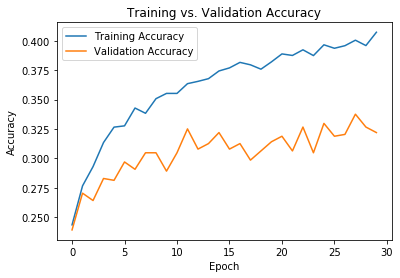

In [0]:
plt.plot(history_df.accuracy, label='Training Accuracy')
plt.plot(history_df.val_accuracy, label='Validation Accuracy')

plt.legend()

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Training vs. Validation Accuracy")

Text(0.5, 1.0, 'Training vs. Validation Loss')

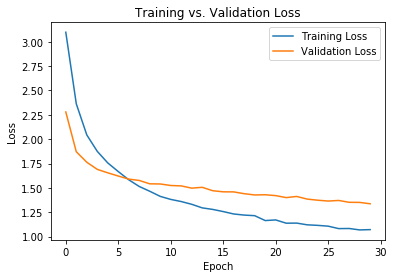

In [0]:
plt.plot(history_df.loss, label='Training Loss')
plt.plot(history_df.val_loss, label='Validation Loss')

plt.legend()

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Training vs. Validation Loss")